In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
file_path = 'food_expiry_large_data.csv'  
food_df = pd.read_csv(file_path)

In [3]:
food_df['Expiry Date'] = pd.to_datetime(food_df['Expiry Date'], errors='coerce')
food_df.dropna(subset=['Expiry Date'], inplace=True)
food_df['Days Left'] = (food_df['Expiry Date'] - datetime.today()).dt.days

In [4]:

food_df = food_df[food_df['Days Left'] >= 0]

In [5]:

if not food_df.empty:
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(food_df[['Days Left']])

In [6]:
print(pd.DataFrame(scaled_df, columns=['Days Left']).head())

   Days Left
0  -0.006705
1  -0.640343
2  -0.572935
3  -0.424636
4   0.963974


In [7]:
inertia = []
k_range = range(1, 11)
for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_df)
        inertia.append(kmeans.inertia_)

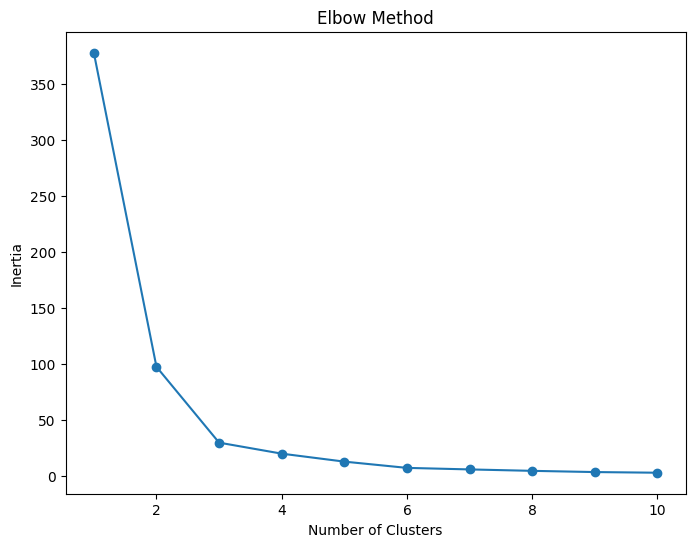

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
food_df['Cluster'] = kmeans.fit_predict(scaled_df)

In [10]:
sil_score = silhouette_score(scaled_df, food_df['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.7891121517558809


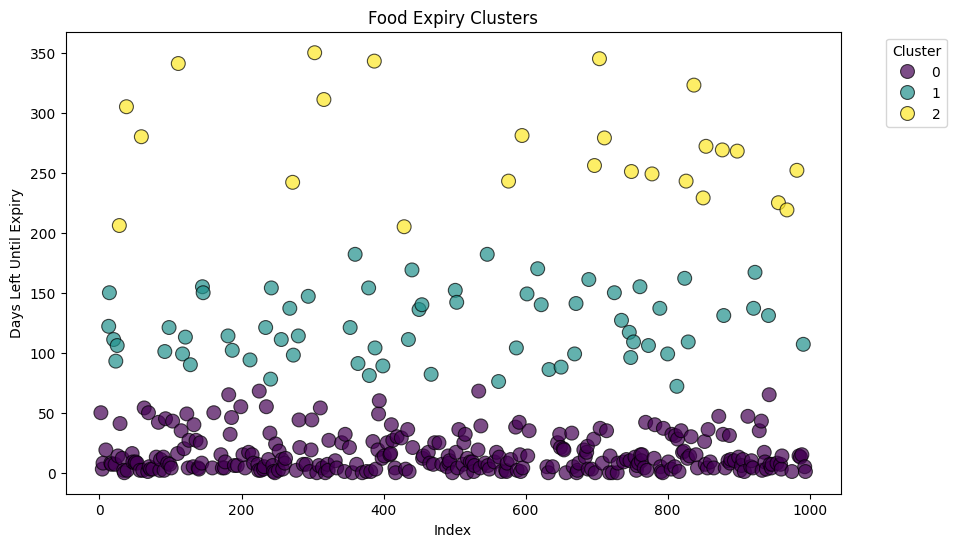

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=food_df.index, y=food_df['Days Left'], hue=food_df['Cluster'], palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.xlabel('Index')
plt.ylabel('Days Left Until Expiry')
plt.title('Food Expiry Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [12]:
recipes = {
    'Milk': ['Pancakes', 'Milkshake'],
    'Bread': ['Sandwich', 'Bread Pudding'],
    'Eggs': ['Omelette', 'Scrambled Eggs'],
    'Tomatoes': ['Tomato Soup', 'Salad'],
    'Cheese': ['Grilled Cheese', 'Mac & Cheese'],
    'Chicken': ['Chicken Curry', 'Grilled Chicken'],
    'Rice': ['Fried Rice', 'Rice Pudding'],
    'Lettuce': ['Salad', 'Wrap'],
    'Yogurt': ['Smoothie', 'Parfait'],
    'Apples': ['Apple Pie', 'Fruit Salad'],
    'Banana': ['Banana Bread', 'Smoothie'],
    'Fish': ['Grilled Fish', 'Fish Curry'],
    'Potatoes': ['Mashed Potatoes', 'French Fries'],
    'Carrots': ['Carrot Soup', 'Stir Fry'],
    'Oranges': ['Orange Juice', 'Fruit Salad'],
    'Peppers': ['Stuffed Peppers', 'Stir Fry'],
    'Spinach': ['Spinach Salad', 'Smoothie'],
    'Butter': ['Butter Chicken', 'Garlic Bread'],
    'Cereal': ['Cereal with Milk', 'Granola Bars'],
    'Pasta': ['Pasta Salad', 'Spaghetti']
}

def suggest_recipes(food_df):
    expiring_soon = food_df[food_df['Days Left'] <= 3]
    for _, row in expiring_soon.iterrows():
        print(f"{row['Food Item']} is expiring soon! Suggested recipes: {', '.join(recipes.get(row['Food Item'], ['No recipes available']))}")


if not food_df.empty:
    suggest_recipes(food_df)

Oranges is expiring soon! Suggested recipes: Orange Juice, Fruit Salad
Apples is expiring soon! Suggested recipes: Apple Pie, Fruit Salad
Cheese is expiring soon! Suggested recipes: Grilled Cheese, Mac & Cheese
Butter is expiring soon! Suggested recipes: Butter Chicken, Garlic Bread
Cereal is expiring soon! Suggested recipes: Cereal with Milk, Granola Bars
Apples is expiring soon! Suggested recipes: Apple Pie, Fruit Salad
Eggs is expiring soon! Suggested recipes: Omelette, Scrambled Eggs
Cheese is expiring soon! Suggested recipes: Grilled Cheese, Mac & Cheese
Potatoes is expiring soon! Suggested recipes: Mashed Potatoes, French Fries
Cheese is expiring soon! Suggested recipes: Grilled Cheese, Mac & Cheese
Carrots is expiring soon! Suggested recipes: Carrot Soup, Stir Fry
Cheese is expiring soon! Suggested recipes: Grilled Cheese, Mac & Cheese
Cheese is expiring soon! Suggested recipes: Grilled Cheese, Mac & Cheese
Oranges is expiring soon! Suggested recipes: Orange Juice, Fruit Salad
Y